# Examples of using the data parsing tool
This notebook serves to show examples of how to use the analysis tool

All folders starting with `data` are ignored by git in this repo, so you need to make sure you have the data locally on your machine.

For more detailed documentation on how to set up the tool please refer to the `docs/` directory.

In [9]:
from src import (
    DataInterface,
    RunInfo,
    BaseTools,
    IbexCoremarkTools,
    IbexHwsecCoremarkTools,
    CriticalError,
    DataCorruptionError,
    SilentError,
)

## Example 1: Quick overview

In the run configuration instantiated below all debugging options are enabled, and we have no timeout on the data-parser. The data-parser will look for the logs in the `data` directory. Direct interaction with the `runinfo` object is only really useful for debugging purposes, such as making sure you have written the config file correctly

In [32]:
runinfo = RunInfo("src/run_info/example_run_info/example_config_1.ini")

We then instantiate the `data_interface` object, which is how we interact with the data

In [33]:
data_interface = DataInterface(run_info=runinfo)

Parsing SEU logs...
  Could not read /home/anders/Git/Ibex-Analysis/data/seu_2023-09-15_08-24-25.058795/log.txt
  'utf-8' codec can't decode byte 0xcc in position 5835: invalid continuation byte
  Could not read /home/anders/Git/Ibex-Analysis/data/seu_2023-09-12_23-41-25.090640/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6110: invalid continuation byte
  Could not read /home/anders/Git/Ibex-Analysis/data/seu_2023-09-12_22-05-06.376439/log.txt
  'utf-8' codec can't decode byte 0xcc in position 6483: invalid continuation byte
  Could not read /home/anders/Git/Ibex-Analysis/data/seu_2023-09-18_12-37-30.570476/log.txt
  'utf-8' codec can't decode byte 0xcc in position 5742: invalid continuation byte
  Could not read /home/anders/Git/Ibex-Analysis/data/seu_2023-09-17_15-09-31.286638/log.txt
  'utf-8' codec can't decode byte 0xcc in position 5835: invalid continuation byte
  Could not read /home/anders/Git/Ibex-Analysis/data/seu_2023-09-16_18-42-29.461108/log.txt
  'utf-8' cod

We can see above that we enabled all debugging options. Running this in a notebook will result in some information being cut off, I therefore recommend running your analysis in a python script if you want debugging

We also see that given the data I have on my system, we have 46% of our nodes unpopulated. This means that of the nodes specified by the register list, 46% of them don't have any associated data. This set of data is quite small, so it is not unrealistic. If you have a large % of uncovered nodes, and a lot of data, make sure you specified your registers correctly

In [34]:
path = "ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top."
path += "u_ibex_top.gen_regfile_ff.register_file_i"

node = data_interface.get_node_by_path(path)
print(node.name)

node_data = data_interface.get_data_by_node(node)
node_data.head()

register_file_i


,register,register_delimiter,injection_cycle,bit_number,value_before,value_after,seed_crc,list_crc,matrix_crc,state_crc,final_crc
seu_2023-09-11_23-14-43.659698,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,233290,23,8203f6d0,8283f6d0,NaN,NaN,NaN,NaN,NaN
seu_2023-09-12_03-15-40.606839,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,17369.9,5,00000000,00000020,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-09-12_07-08-35.094762,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,272170,27,8203fb34,8a03fb34,0xe9f5,0x1fec,0x1fd7,0x8e3a,0x1fec
seu_2023-09-14_15-51-06.031115,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,280054,12,00000021,00001021,NaN,NaN,NaN,NaN,NaN
seu_2023-09-16_04-49-26.624457,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,159718,24,8203fb8e,8303fb8e,NaN,NaN,NaN,NaN,NaN


Above we choose to query the data by the node `register_file_i`. This node is a grouping of all registers of the core, and as such when we get data on this node we get all injections on the registers of the core

Below we get the error classifications and rates of those classifications, both on the register file and on the SoC as a whole. This way we should be able to see a difference between the error rates on different parts of the SoC.

The error classification method is on the `BaseTools` class, and as such when you create a class which inherits from this you can use that. I use the class created specifically for this dataset

/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


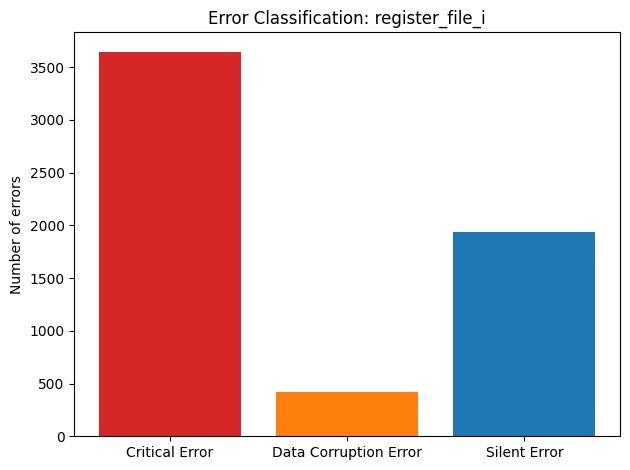

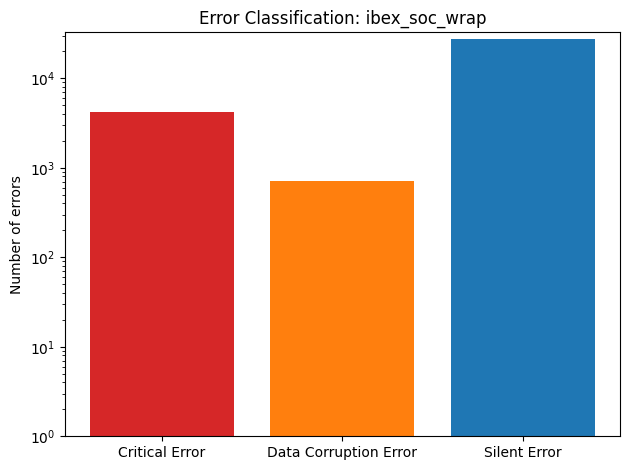

In [35]:
all_data = data_interface.get_data_by_node(data_interface.root)

node_errs, node_fig = IbexCoremarkTools.error_classification(
    node_data, data_interface.golden_log, True
)
all_errs, all_fig = IbexCoremarkTools.error_classification(
    all_data, data_interface.golden_log, True
)

Above we see that in general the register file is less resilient. The certainty of the rate estimates is not in this calculation. We will see how to get those later.

We can also get error rates over time, by using a windowing method on the `BaseTools` class. Do note that a larger window-size will result in a better resolution in the rate in a given window, but a larger window_size will also reduce the resolution in time

/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:171: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:171: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:171: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


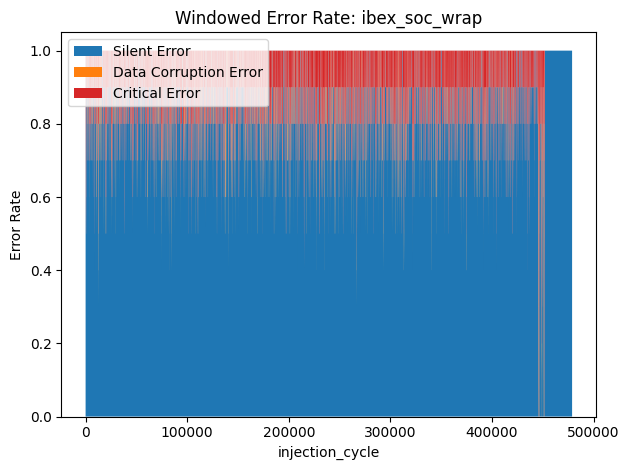

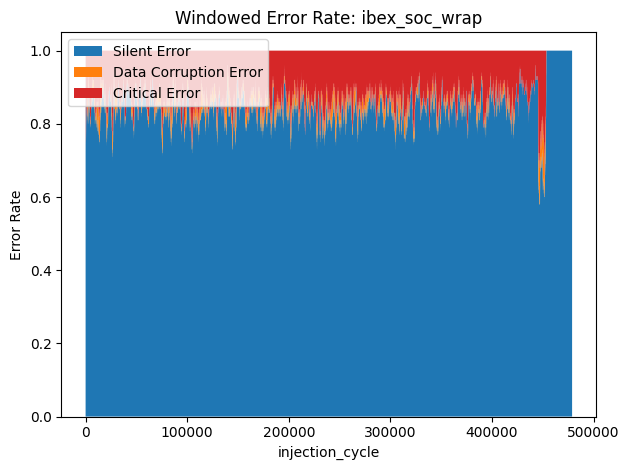

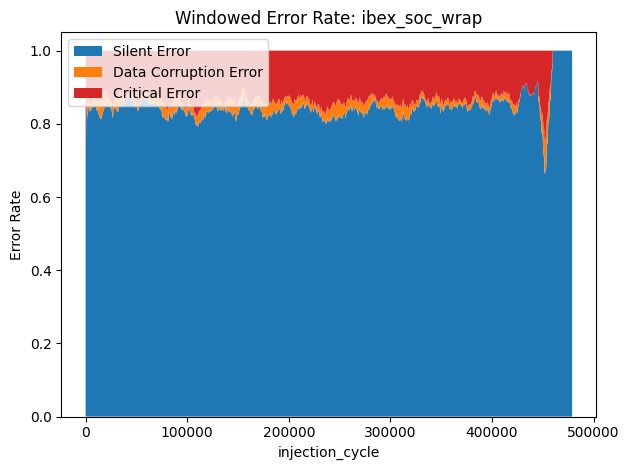

In [36]:
all_err_rate, fig = IbexCoremarkTools.windowed_error_rate(
    all_data,
    data_interface.golden_log,
    "injection_cycle",
    window_size=10, 
    visualize=True,
)

all_err_rate, fig = IbexCoremarkTools.windowed_error_rate(
    all_data,
    data_interface.golden_log,
    "injection_cycle",
    window_size=100,
    visualize=True,
)

all_err_rate, fig = IbexCoremarkTools.windowed_error_rate(
    all_data,
    data_interface.golden_log,
    "injection_cycle",
    window_size=500,
    visualize=True,
)

## Example 2: More data, more confident

This example will use config file number 2, in the same directory as in [Example 1](#example-1-quick-overview). The biggest difference between the two is that we are now working with a much larger data-set, and we are setting a timeout on the data-parsing. Note that I have also disabled all debugging in the second config file

In [37]:
runinfo = RunInfo("src/run_info/example_run_info/example_config_2.ini")
data_interface = DataInterface(runinfo)

Timed out after 15 seconds


Above we can see that the timeout more or less worked. The timeout only works specifically on reading singular logs, so it won't be hit exactly.

In [38]:
print(f"Number of parsed logs: {len(data_interface.seu_log)}")

Number of parsed logs: 64364


If we want to know how sure we can be of our estimates we can calculate the confidence intervals of these estimates. These confidence intervals will become more precise the more data we have, since they work on the principle of the central limit theorem. A good rule of thumb is to not trust the error bars with the number of samples analyzed for each error category is under 30

In [39]:
path = "ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top."
path += "u_ibex_top.gen_regfile_ff.register_file_i"

node = data_interface.get_node_by_path(path)
node_data = data_interface.get_data_by_node(node)
node_data.head()

,register,register_delimiter,injection_cycle,bit_number,value_before,value_after,seed_crc,list_crc,matrix_crc,state_crc,final_crc
seu_2023-09-17_10-56-17.688670,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,274738,13,00000000,00002000,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-09-11_23-14-43.659698,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,233290,23,8203f6d0,8283f6d0,NaN,NaN,NaN,NaN,NaN
seu_2023-09-16_01-52-59.084184,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,379290,15,00060000,00068000,0xe9f5,0xe714,0x1fd7,0x8e3a,0xe714
seu_2023-09-17_12-00-38.999842,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,391565,8,00000000,00000100,NaN,NaN,NaN,NaN,NaN
seu_2023-09-15_02-58-55.467580,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,340866,4,8203f740,8203f750,0x61eb,0x0000,0x1fd7,0x8e3a,0x8f84


When we run the code we expect to get a number of injections on the same bit at the same cycle (to understand why refer to the `docs/` directory). When we inject on a point we have already injected on we can consider that a "wasted" run. The number of wasted runs after $N$ simulations is a random variable $M$ with a distribution I have not derived. 

I have derived the variance of $M$, and the expected number of points with one or more "wasted runs" $M^*$

In [40]:
n_bits = 5600
n_cycles = 40_000
n1_runs = 1_000
n2_runs = 10_000
n3_runs = 100_000
n_runs = [n1_runs, n2_runs, n3_runs]

Es = list()
Vs = list()

for N in n_runs:
    expected_n_multi_inject_runs = IbexCoremarkTools.expected_num_multi_injection_runs(
        n_injection_cycles=n_cycles, n_target_bits=n_bits, n_runs=N
    )
    variance_n_wasted_runs = IbexCoremarkTools.variance_num_multi_injection_runs(
        n_target_bits=n_bits, n_runs=N, n_injection_cycles=n_cycles
    )
    
    Es.append(expected_n_multi_inject_runs)
    Vs.append(variance_n_wasted_runs)

for N, e, v in zip(n_runs, Es, Vs):
    print(f"N={N} => E[M*]={e:.2e}, Var[M]={v:.2e}")

N=1000 => E[M*]=2.23e-03, Var[M]=2.23e-06
N=10000 => E[M*]=2.23e-01, Var[M]=2.23e-05
N=100000 => E[M*]=2.23e+01, Var[M]=2.23e-04


Below we'll have a look at how confident we can be of our results. In Bayesian terms the confidence is the probability that the true parameter of the system (say the critical error rate in this case) is within the interval. Since we're using frequntist statistics we say that we have 95% confidence that the true parameter of the system is within the interval (if you choose to interpret it that way I won't tell the mathematicians).

/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:282: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()



Node Confidence interval:
Critical Error           0.002413
Data Corruption Error    0.002786
Silent Error             0.003383
dtype: float64


All Confidence interval:
Critical Error           0.000644
Data Corruption Error    0.000659
Silent Error             0.000902
dtype: float64



/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:282: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


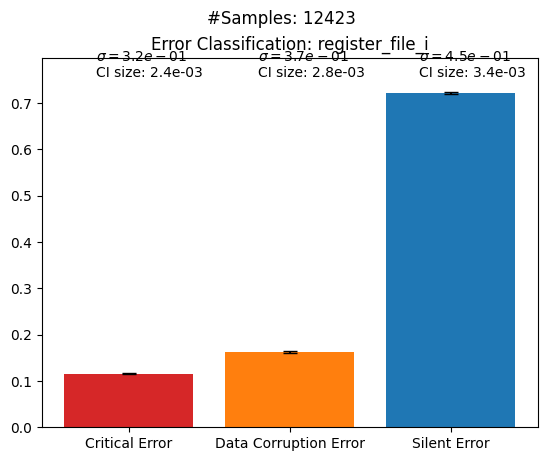

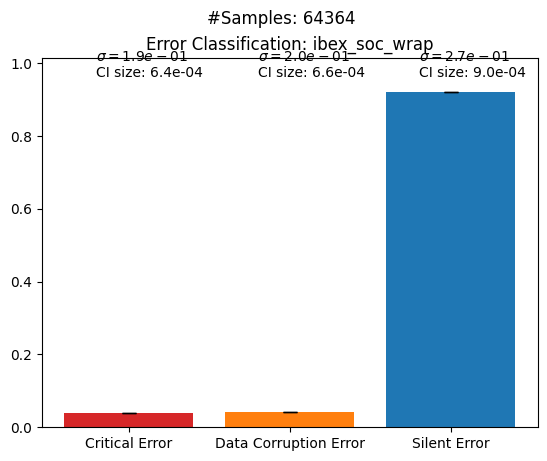

In [41]:
node_ci, fig = IbexCoremarkTools.error_classification_confidence(
    node_data,
    data_interface.golden_log,
    confidence=0.8,
    visualize=True,
)

all_ci, fig = IbexCoremarkTools.error_classification_confidence(
    data_interface.get_data_by_node(data_interface.root),
    data_interface.golden_log,
    confidence=0.8,
    visualize=True,
)

print(f"\nNode Confidence interval:\n{node_ci}\n")
print(f"\nAll Confidence interval:\n{all_ci}\n")

We see above that the confidence intervals above are of drastically different sizes

In [42]:
print(node_ci / all_ci)

Critical Error           3.747967
Data Corruption Error    4.228904
Silent Error             3.751883
dtype: float64


In fact, we see that the size of the confidence intervals on the single node are multiple times larger than those of the entire SoC. This makes sense since the variance of our estimates decrease with an increasing number of samples.

Making the confidence level much larger will also result in a larger interval

Critical Error           4.418872
Data Corruption Error    4.418872
Silent Error             4.418872
dtype: float64


/home/anders/Git/Ibex-Analysis/src/analysis/base_tools.py:282: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


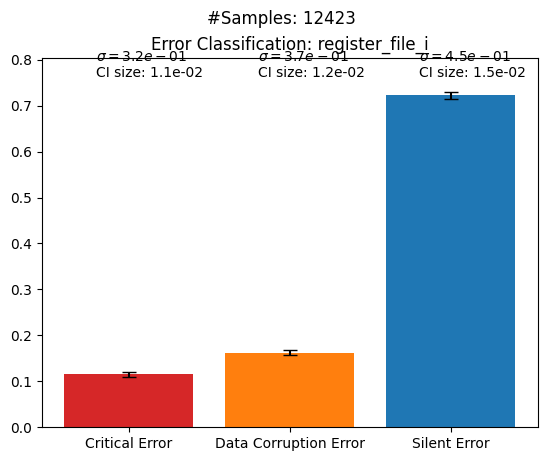

In [43]:
_node_ci, fig = IbexCoremarkTools.error_classification_confidence(
    node_data,
    data_interface.golden_log,
    confidence=0.9999,
    visualize=True,
)
print(_node_ci / node_ci)

This change is due to the fact that there is an inverse relationship between the confidence level, and the size of the confidence interval.

If you want to be more sure of where your parameter is, use a higher confidence level, but beware that more runs are needed to get a similarly small confidence interval

## Example 3

In this example we use a new config file with optional data, to see how to change out the config file when a new hardware configuration is used, along with new information in the log files.

In [3]:
runinfo = RunInfo("src/run_info/ibex_hwsec_coremark.ini")
data_interface = DataInterface(runinfo)

Parsing SEU logs...
  Could not read /home/anders/Git/PULSE/data_hwsec/seu_2023-09-17_18-07-04.607969/log.txt
  'utf-8' codec can't decode byte 0xf8 in position 6517: invalid start byte
  Could not read /home/anders/Git/PULSE/data_hwsec/seu_2023-09-18_09-53-25.873158/log.txt
  'utf-8' codec can't decode byte 0xfc in position 6236: invalid start byte
  Could not read /home/anders/Git/PULSE/data_hwsec/seu_2023-09-17_20-53-03.669063/log.txt
  'utf-8' codec can't decode byte 0xc8 in position 6454: invalid continuation byte
  Parsed 12068 logs, percent failed reads: 0.02%
Done parsing SEU logs
Building register tree
  23.01% of the register tree is unpopulated
Built register tree


In [4]:
path = "ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top."
path += "u_ibex_top.gen_regfile_ff.register_file_i"

node = data_interface.get_node_by_path(path)

In [5]:
name = "register_file_i"
nodes = data_interface.get_node_by_name(name)
print(f"{len(nodes)} node(s) found by name")

name_node = nodes[0]

print(f"Node by name: {name_node.soc_path}\nNode by path: {node.soc_path}")

1 node(s) found by name
Node by name: ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibex_top.gen_regfile_ff.register_file_i
Node by path: ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibex_top.gen_regfile_ff.register_file_i


In [6]:
node_data = data_interface.get_data_by_node(node)
root_data = data_interface.get_data_by_node(data_interface.root)

print(f"Number of entries on node_data: {len(node_data)}")
print(f"Number of entries on root_data: {len(root_data)}")

node_data.head()

Number of entries on node_data: 2320
Number of entries on root_data: 12068


,register,register_delimiter,injection_cycle,bit_number,value_before,value_after,seed_crc,list_crc,matrix_crc,state_crc,final_crc,alert_val,alter_cyc
seu_2023-09-17_21-43-15.060121,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,221952,14,8203f6d0,8203b6d0,NaN,NaN,NaN,NaN,NaN,0,0
seu_2023-09-18_03-04-25.088639,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,163608,2,8203f6b0,8203f6b4,NaN,NaN,NaN,NaN,NaN,0,0
seu_2023-09-17_19-59-21.460123,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,156051,24,00000000,01000000,NaN,NaN,NaN,NaN,NaN,0,0
seu_2023-09-17_17-07-47.031438,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,198881,7,8203fd44,8203fdc4,0xe9f5,0xe9ab,0x1fd7,0x8e3a,0xe9ab,0,0
seu_2023-09-17_21-39-45.042311,ibex_soc_wrap.ibex_soc_i.ibex_wrap.u_top.u_ibe...,0-beta4 Date: 2022-04-12,306924,28,8203f6d0,9203f6d0,0xe9f5,0xa7d3,0x1fd7,0x8e3a,0xa7d3,0,0


The biggest visible difference is that we have two new columns in the `SeuLog`, corresponding to the entries defined under the `OPTIONAL_DATA` section of the config file

In [7]:
from src import SilentError, DataCorruptionError, CriticalError

print(SilentError())
print()
print(DataCorruptionError())
print()
print(CriticalError())

Silent Error (tab:blue)
Logs where we can't tell the difference from the golden run, using [COMPARISON_DATA] from the .ini

Data Corruption Error (tab:orange)
Logs with different values to the golden log are considered data corruption errors

Critical Error (tab:red)
Logs with missing information are considered critical errors. (NaN in the seu_log dataframe)


/home/anders/Git/PULSE/src/analysis/ibex_hwsec_coremark_tools.py:88: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/anders/Git/PULSE/src/analysis/ibex_hwsec_coremark_tools.py:88: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


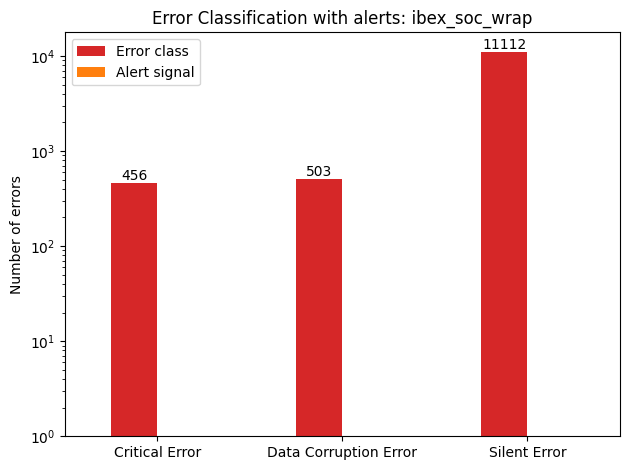

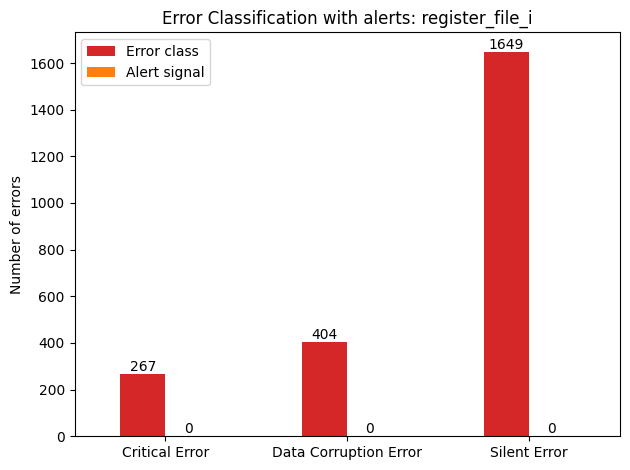

In [10]:
# node_classifications, node_fig = BaseTools.error_classification(
#     node_data, data_interface.golden_log, True
# )
# root_classifications, root_fig = BaseTools.error_classification(
#     root_data, data_interface.golden_log, True
# )

alert_classifications = IbexHwsecCoremarkTools.alert_classification(
    root_data, data_interface.golden_log, True
)

alert_classifications = IbexHwsecCoremarkTools.alert_classification(
    node_data, data_interface.golden_log, True
)

/home/anders/Git/PULSE/src/analysis/ibex_coremark_tools.py:84: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


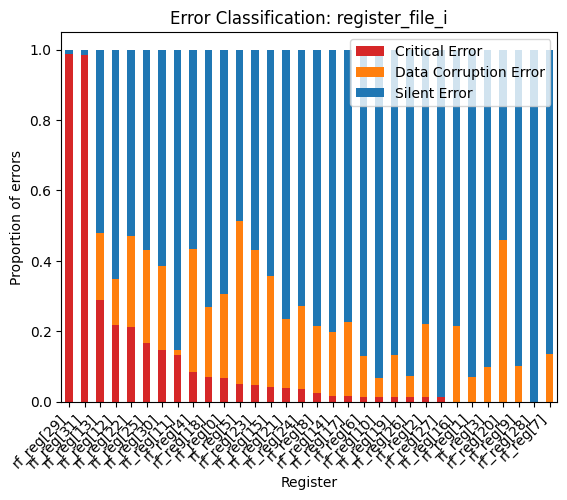

In [11]:
stacked = IbexHwsecCoremarkTools.stacked_register_error_class(
    node_data, data_interface.golden_log, True
)